<a href="https://colab.research.google.com/github/SimonOlshanCantin/Ok/blob/main/Position_Radiation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install radiation simulator
!pip install git+https://github.com/nasa/radbelt.git  
#install orbit simulator (old commit that works w python 3.7)
!pip install git+https://github.com/pytroll/pyorbital.git@cbe67e2f1136b5fb1fe6935f628845315abb6886  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nasa/radbelt.git to /tmp/pip-req-build-n58f07s_
  Running command git clone -q https://github.com/nasa/radbelt.git /tmp/pip-req-build-n58f07s_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for radbelt: filename=radbelt-0.1.0-cp37-cp37m-linux_x86_64.whl size=209565 sha256=58dde0bded0f76dc11e8b2dfdd0c509a4aca3eac14b3bd4f2e378d3c56f5241e
  Stored in directory: /tmp/pip-ephem-wheel-cache-1t4b8dmm/wheels/fd/52/6b/77fd56822006682f4144bcca2875fd491ab82f8db490071457
Successfully built radbelt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pytroll/pyorbital.git (to revision cbe67e2f1136b5fb1fe6935f628845315abb6886) to /tmp/pip-req-build-jyyvmeu5
  Running command git clone -q https://github.com/

In [2]:
from radbelt import get_flux
from astropy import units as u
from astropy.coordinates import EarthLocation
from astropy.time import Time
from pyorbital.orbital import Orbital
from datetime import datetime
import numpy as np   
import pandas as pd 
import math as mt
import matplotlib.pyplot as plt
# from google.colab import drive
# import gspread
# drive.mount('/content/drive')

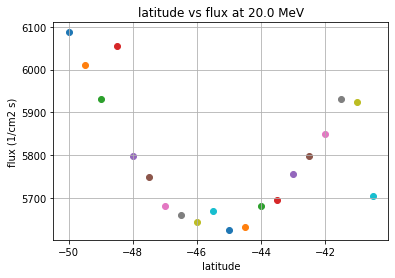

In [ ]:
#User inputs: coordinates, energy, date
for latitude in np.arange(-50,-40,0.5):
  coords = EarthLocation(latitude * u.deg, -30 * u.deg, 800 * u.km)     #presumeabily latitude, longitude, altitude? 'u' 4 universal? When km^ flux^ -> prob altitude
  time = Time('2022-03-01')
  energy = 20 * u.MeV

#actual function
  flux = get_flux(coords, time, energy, 'p', 'max')    
#Plotting like Ronald Reagan baby
  plt.scatter(latitude, flux) 
  plt.xlabel('latitude')
  plt.ylabel('flux (1/cm2 s)')
  plt.title('latitude vs flux at '+ str(energy))
  plt.grid(visible = True)
else:
  plt.show()                            

#**Goal**
output: latitude vs longitude map w radiation represented by a color gradient

In [3]:
#inputs:
altitude = 550
energy = 1 * u.MeV
time = Time('2022-03-01')
jump_size = 1   #this doesn't neccessarily have to be an input but i had a dream about it so here it is. Describes the step size moving along long/lat lines

#define our three empty lists
latitude_list = []
longitude_list = []
flux_list = []

#create an empty dictionary
data = {'Latitudes': latitude_list,'Longitudes': longitude_list, 'Fluxes':flux_list}

for longitude in np.arange(-180,180,jump_size):   #we want to go down each longitude line, taking 0.5 (2atm) degree steps -> we can find radiation at every intersection
  for latitude in np.arange(-90,90,jump_size):
    latitude_list.append(latitude)    #append new latitude to latitude list
    longitude_list.append(longitude)  #append SAME longitude to longitude lists -> keeps all lists the same lenght as radiation list, which is good 
                                      # because when we plot we're going to want a list of (x,y,z) co-ordinates
    coords = EarthLocation(longitude * u.deg, latitude * u.deg, altitude * u.km)
    flux = get_flux(coords, time, energy, 'p', 'max')       #find flux at those coordinates

    flux_list.append(flux.value)       #append flux to the end of flux list -> dataframe should have: latitude, longitude, flux (x,y,z)

    data = {'Latitudes': latitude_list,'Longitudes': longitude_list, 'Fluxes':flux_list} #save list updates into our dictionary    
else:
  datamap = pd.DataFrame(data)  #save dictionary as a dataframe

  #all this is just plotting:    
  plt.scatter(datamap['Longitudes'], datamap['Latitudes'],c = datamap['Fluxes'], cmap="hot_r") #plots! x is longitude, y is latitude, color is flux
  plt.colorbar()
  plt.xlabel('Longitude')          
  plt.ylabel('Latitude')
  plt.title('Flux Map of ' + str(energy) + ' protons at ' + str(altitude) + 'km on ' + str(time))
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in aep8 (vectorized)
  outputs = ufunc(*inputs)


KeyboardInterrupt: ignored

#**Goal**
**input:** satalite, time

**Output:** Position, df w energy vs flux

On 7/9/2022 the satallite has a longitude of -62.45185056606736 degrees, a latitude of 53.464278415699525 degrees and an alitude of 531.2948469858924 km


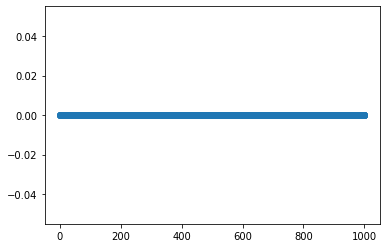

In [4]:
#Take TLE input file and output energy vs flux for a specific moment in time

#input:
satellite_name = ('VZLUSAT-2')  #TLE found on https://celestrak.org/; to make your own create tle file then enter 'name', 'path/to/file' in to Orbital()
date_entry = (2022,7,9,1,27) #FORMAT: year, month, day, hours, minutes


orbit = Orbital(satellite_name) #Searches TLE file for object in quotes & gets its orbital information

year, month, day, hours, minutes,  = date_entry
date = datetime(year, month, day, hours, minutes) #datetime() makes the date readable  - but it won't take a tuple 
date_radbelt = Time(date) #Time() makes date readable for radbelt

coords = orbit.get_lonlatalt(date)  #retrieves longitude latitude and altitude at specified time, assigns it to below touple
lon, lat, alt = coords  #coords is a tuple. This line creates the variable and names each place in the list so it can be refreed to by a specific variable
coords_radbelt = EarthLocation(lon * u.deg, lat * u.deg, alt * u.km) #makes coordinates useable for radbelt

#This gives american style dates, btw. I'm like 80% sure
print ('On '+ str(month) + '/' + str(day) + '/' + str(year) + ' the satallite has a longitude of ' + str(lon) + ' degrees, a latitude of ' + str(lat) + " degrees and an alitude of " + str(alt) + ' km')

energy_list = []
flux_list = []
fe_dict = {'Flux': flux_list, 'Energy': energy_list}

for energy in np.linspace(0.1,1000,2000):   #get flux vs energy for 2000 intervals btw 0.1 & 1000 Mev
  flux = get_flux(coords_radbelt, date_radbelt, energy * u.MeV, 'p', 'max')
  flux_list.append(flux.value)
  energy_list.append(energy)

else: #plot!
  plt.scatter(energy_list,flux_list)


#**Goal:**
**Inputs:** satallite tle, energy

**Outputs:** flux at a specific energy as a function of time; map of the satallites tragectory as a function of time w color corresponding to flux -> df w time, lat, long, flux

**NB:** date changes as time changes

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in aep8 (vectorized)
  outputs = ufunc(*inputs)


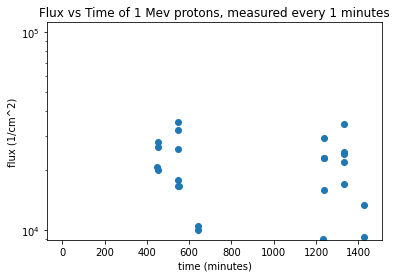

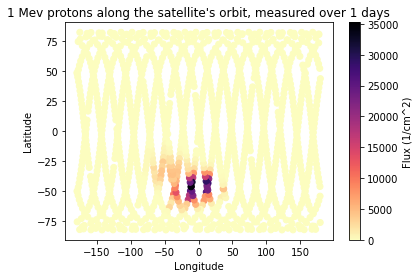

In [5]:
#inputs:

satellite_name = ('VZLUSAT-2')  #TLE found on https://celestrak.org/; to make your own create tle file then enter 'name', 'path/to/file' in to Orbital()

year = 2022
month = 7
day = 9
hour = 1
minute = 1

#how long you're looking at the object for, in days. (must not be long enough that we transition into a new year)
measurement_period = 1

#how often you're measuring, in minutes.
measure_every = 1

energy = 1

#code:
orbit = Orbital(satellite_name)

timecount = measurement_period*24*60 #convert measurement period into minutes

timecount_list = []  #create empty lists
lon_list = []
lat_list = []
flux_list = []
flux_list_unitless = []

for timecount in np.arange(0,timecount,measure_every): #measure every 20 minutes for the measurement period
  minute = minute + measure_every  #add specified # of minutes to our clock

  if minute >= 60:  #if we get above 60 minutes move our clock up an hour, if we've moved more than 24 hours move it up a day, etc
    minute = minute -60
    hour = hour + 1
    if hour >= 24:
      hour = hour -24
      day = day +1
      if ((month == 1,3,5,7,8,10,12) and (day > 31)): #If only all the months were the same lenght... If only I could spell lenghth
        day = day - 31
        month = month +1
      elif ((month == 4,6,9,11) and (day >30)):
        day = day - 30
        month = month + 1
      elif ((month == 2)and (day>28)):
        day = day - 28
        month = month + 1

  else:
    time = datetime(year, month, day, hour, minute)  #make our clock readable 
    coords = orbit.get_lonlatalt(time)  #get coords at specified time
    lon, lat, alt = coords  #name each value in coords tuple

    time_radbelt = Time(time) #make our clock readable for radbelt
    coords_radbelt = EarthLocation(lon * u.deg, lat * u.deg, alt * u.km) #make our coordinates readable for radbelt
    flux = get_flux(coords_radbelt, time_radbelt, energy * u.MeV, 'p', 'max') #get the flux

    lon_list.append(lon)  #record latitude longitude and time ellapsed values
    lat_list.append(lat)
    timecount_list.append(timecount) #this is time ellapsed not clock time
    flux_list.append(flux.value)
else:
#plotting: ()
  plt.scatter(timecount_list,flux_list)
  plt.xlabel("time (minutes)")
  plt.ylabel("flux (1/cm^2)")
  plt.yscale("log")
  plt.title('Flux vs Time of ' + str(energy) + ' Mev protons, measured every ' + str(measure_every) + ' minutes')
  plt.show ()

  plt.scatter(lon_list, lat_list, c = flux_list, cmap="magma_r")
  cbar = plt.colorbar()
  cbar.set_label("Flux (1/cm^2)")
  plt.xlabel('Longitude')          
  plt.ylabel('Latitude')
  plt.title(str(energy) + " Mev protons along the satellite's orbit, measured over " + str(measurement_period) + " days")
  plt.show()

  flux_array = np.array(flux_list) #make array of flux values

#Take trapezoidal approximation of integral flux
  flux_integral = np.trapz(flux_array, dx = measure_every)
  print("The total flux over a " + str(measurement_period) +  " day period is "+str(flux_integral) + " protons /cm^2 ")

#find average of flux values
  flux_avg = np.average(flux_array)
  print("The average flux per minute is " + str(flux_avg) + " 1Mev protons /cm^2")

# #find median of flux values
#   flux_med = np.median(flux_array)
#   print("At any given time, the flux has a 50% chance of being above " + str(flux_med)+ "and a 50% chance of being below" + str(flux_med))

# #find peak of flux values
  flux_peak = np.amax(flux_array)
  print("The flux peaks at " + str(flux_peak)+" protons/cm^2")

#find standard deviation
  flux_sd = np.std(flux_array)
  print("The standard deviation is " + str(flux_sd))

#find percent of time that the satalite experiences flux
  flux_nozeros = flux_array[flux_array > 0] #create array with no zeroes
  flux_percent_nozeroes = 100*len(flux_nozeros)/len(flux_array) #use relative length of arrays to find percent
  #print("The satellite experiences "+str(energy)+" Mev proton flux for " + str(np.around(flux_percent_nozeroes,2))+"% of the " +str(measurement_period)+ " day long measurement period")
  print("The satellite experiences "+str(energy)+" Mev proton flux for " + str(flux_percent_nozeroes)+"% of the " +str(measurement_period)+ " day long measurement period")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Goal:**
**Inputs:** filepath to google sheet containing all satalite data

**Outputs:** 3d scatterplot

                   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0                         NaN         NaN         NaN         NaN   
1    SHIJIAN-6 05A (SJ-6 05A)       470.0       97.00         NaN   
2               STARLINK-3317       540.0       53.00         NaN   
3               FGRST (GLAST)       550.0       26.00         NaN   
4                       SWIFT       590.0       20.00         NaN   
..                        ...         ...         ...         ...   
127                  RISAT-2B       573.0       37.00         NaN   
128               STARLINK-71       437.0       53.00         NaN   
129              FORMOSAT 7-3       537.0       24.00         NaN   
130              FORMOSAT 7-1       538.0       24.00         NaN   
131                 ARMADILLO       314.0       28.52         NaN   

       Unnamed: 4  Unnamed: 5    Unnamed: 6   Unnamed: 7  Unnamed: 8  \
0             NaN         NaN           NaN          NaN         NaN   
1    5.223347e+05  368.8804

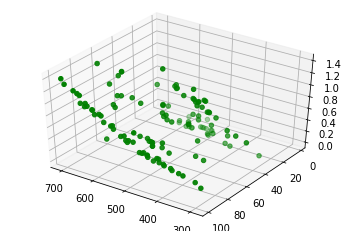

In [14]:
from mpl_toolkits import mplot3d

#import csv w all teh data
data_df = pd.read_csv('/content/drive/MyDrive/Satellite_data_mod_3.csv')
print(data_df)
#plot
#plt.scatter(data_df['Unnamed: 1'],data_df['Unnamed: 2'])
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(data_df['Unnamed: 1'],data_df['Unnamed: 2'], data_df['Unnamed: 4'], color = "green")
ax.view_init(40,125)
plt.show()

In [41]:
#this does the same thing but uses plotly and is prettier
import plotly.express as px
fig = px.scatter_3d(data_df, x="Unnamed: 1", y="Unnamed: 2", z="Unnamed: 6", color="Unnamed: 6",
                    labels={
                     "Unnamed: 1": "avg altitude (km)",
                     "Unnamed: 2": "Inclination (degrees)",
                     "Unnamed: 6": "Peak flux"
                    },
                 title= "graph of inclination and altitude vs neet flux", opacity=0.7)
fig.update_traces(marker={'size': 5})
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
ar = np.array([1,6,4,2,0,2,3,4,3,2,0,7])
onpeak = False

for i in ar: #examine every value in our array of fluxes
    if i > 0 and onpeak == False:
      array = np.split(ar,[i])
    elif i >0:                     
      onpeak = True
    else:
      onpeak = False
else:
  print(array)

[array([1, 6, 4, 2, 0, 2, 3]), array([4, 3, 2, 0, 7])]


#**Satellites**
SHIJIAN-6 05A (SJ-6 05A): One of a pair of Chinese 'technology satellites' (?) probing radiation environment **In polar LEO (~470 km)**

STARLINK-3317: daddy elon gets what daddy elon wants. **53.2177 inclination, ~540 km**

->all starlink sattelites are at ~53 incl

FGRST (GLAST):Fermi Gamma-ray Space Telescope, making gamma observations from a leo **25.5835 inclination, 550km**

ONEWEB-0389: Internet satallite in **polar (87.9553) orbit at ~1200km**

ZY-1 02E: Chinese Earth observation satellite **polar (98.5733) at ~730 km**

YAOGAN-35 A: Chinese military satalite **35 degree inclination, unknown altitude** (probably around 400 km)